In [7]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=25)

In [9]:
X

array([[ 0.66722345, -0.11697552],
       [ 0.21915571, -0.73115232],
       [ 0.11348561, -0.7081059 ],
       [-4.13830282, -2.01199214],
       [ 0.2671365 ,  1.63493163],
       [-3.37984898,  0.15599044],
       [-4.3395079 ,  1.07782053],
       [ 0.5536367 ,  0.80626713],
       [-0.09067699,  0.74859527],
       [-4.50718038,  0.75152794],
       [-4.32572723, -0.90114581],
       [-4.32729629, -0.1815243 ],
       [ 0.44603449, -2.98092432],
       [ 1.27361031,  1.20500136],
       [-4.3744499 ,  0.78302407],
       [ 0.85528328,  0.42968688],
       [ 0.32688933, -0.73229726],
       [-4.42699716, -0.83930476],
       [ 0.28564689,  0.83727062],
       [-4.31803309, -0.10255323],
       [-4.82401804,  0.65867001],
       [-4.61263278,  0.92649819],
       [-3.86434327,  0.10216193],
       [ 2.07840859,  0.46886454],
       [-3.7639417 ,  0.45432938],
       [ 1.0819483 ,  1.8613386 ],
       [-4.33504732, -0.79255991],
       [-3.58892937, -1.0004391 ],
       [-4.94811359,

In [10]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

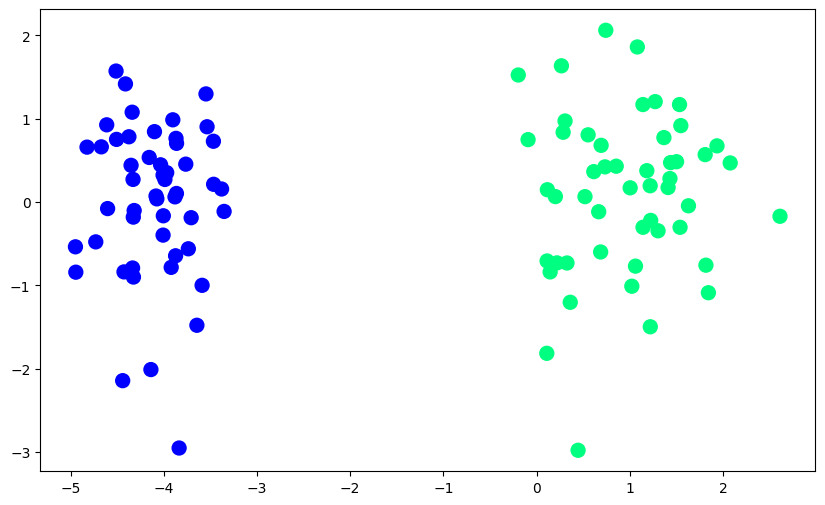

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [15]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    #1000 is epochs
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

In [16]:
def step(z):
    return 1 if z>0 else 0

In [17]:
intercept_, coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.05563032 0.52024363]
1.2000000000000002


In [18]:
m = - (coef_[0] / coef_[1])# -(a/b)
b = - (intercept_ / coef_[1])# -(c/b)

In [19]:
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b

(-3.0, 2.0)

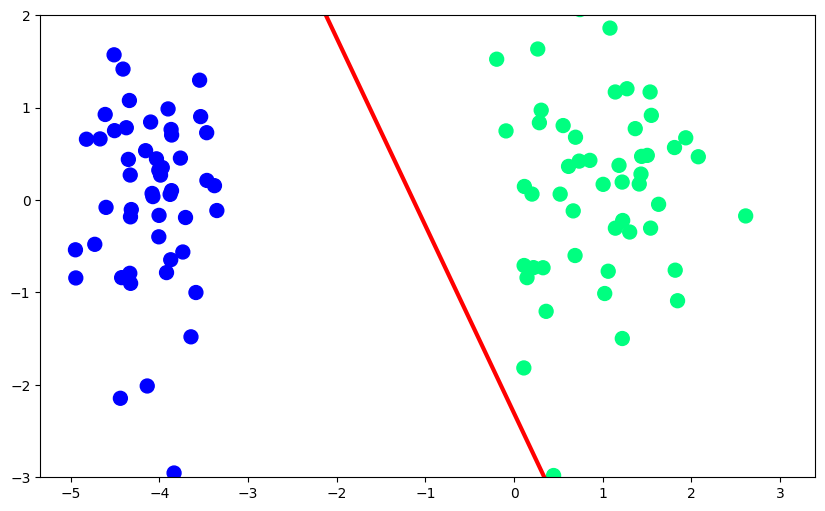

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='r', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

### sklearn perceptron

In [21]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [22]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [23]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

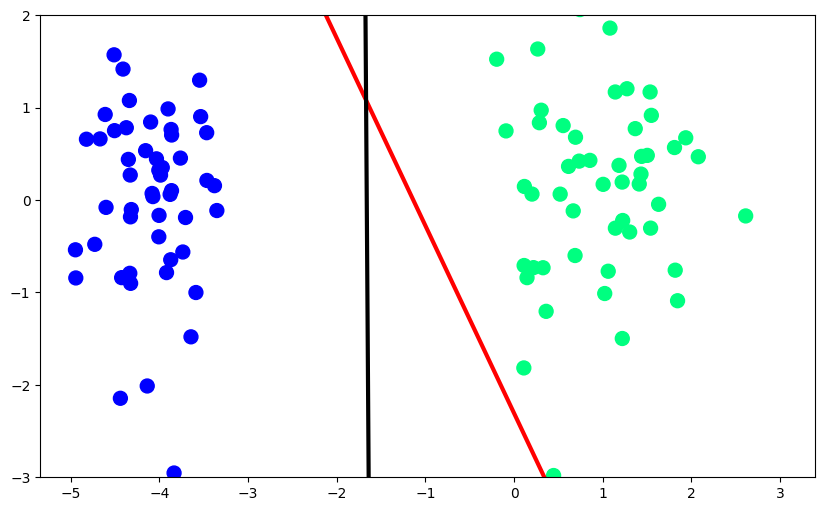

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#### black - using sklearn logistic regression
#### red - our perceptron step func

### Using Sigmoid

In [26]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    #1000 is epochs
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
intercept_, coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[2.47228176 0.05949887]
2.7768767825323777


In [29]:
m = - (coef_[0] / coef_[1])# -(a/b)
b = - (intercept_ / coef_[1])# -(c/b)

In [30]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m * x_input + b

(-3.0, 2.0)

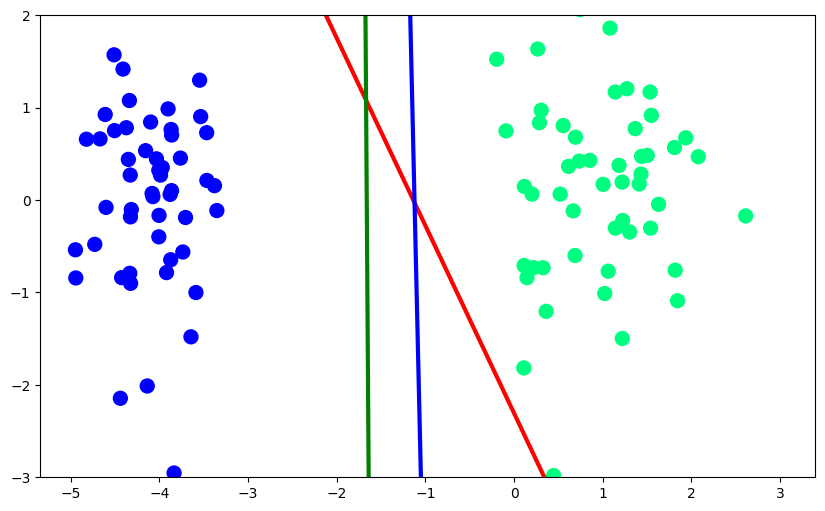

In [31]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='r', linewidth=3)
plt.plot(x_input1,y_input1,color='g',linewidth=3)
plt.plot(x_input2,y_input2,color='b',linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

#### red - our perceptron using step func
#### green - using sklearn logistic regression
#### blue - our perceptron using sigmoid func

#### still dont get the optimal solution as compared to sklearn LogR